<font color=#DC143C size=5 face="黑体">NOTES</font>
<hr>
** 在初始的波动率的测试方案中使用了1e-8的收敛精度 **
<p>
** 在后期将 优化器的 收敛精度更改为1e-4,因此结果与下面部分可能存在差异 **

### 更新 2018-07-31(30)
<li>增加returnRiskRatio参数调整风险和收益的数量级</li>
<li>使用 跟踪误差 进行 [风险预算]</li>
<li>对跟踪误差最小化中 增加 [active_bounds]主动上下限 </li>


In [ ]:
import pandas as pd
import numpy as np
ratio = np.arange(0.01,1,0.05)
test = [(r,1-r) for r in ratio]
ratio = [t[0]/t[1] for t in test]
from optimizer_v_develop import *
order_book_ids =['000333.XSHE',
 '000723.XSHE',
 '000826.XSHE',
 '000895.XSHE',
 '002252.XSHE',
 '002572.XSHE',
 '600276.XSHG',
 '600958.XSHG',
 '601607.XSHG',
 '603799.XSHG']
date = get_previous_trading_date("2017-02-01")
annualized_return = get_price(order_book_ids,end_date=date,fields="close").iloc[-252:].dropna(how="all").apply(lambda x: x[-1]/x[0]-1)

In [2]:
optimization_results = {}
for i,_test in enumerate(test):
    _optimization_results = portfolio_optimize(order_book_ids,date,method=OptimizeMethod.MEAN_VARIANCE,annualized_return=annualized_return,returnRiskRatio=_test)
    optimization_results[i] = _optimization_results[0]
df = pd.concat(optimization_results.values(),keys=optimization_results.keys()).unstack()
df.index=ratio

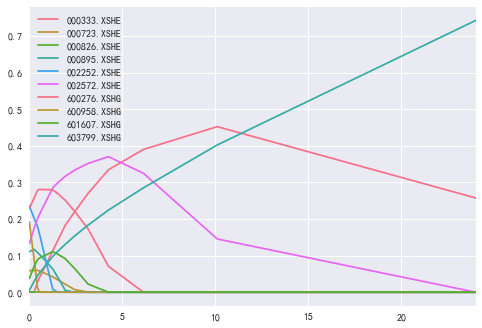

In [3]:
import matplotlib.pyplot as plt
# df.plot.area(cmap=plt.get_cmap('tab20'))
df.plot()

In [ ]:
annualized_return.sort_values(ascending=False)

### part2 使用跟踪误差进行风险预算

In [4]:
from optimizer_v_develop import *
order_book_ids =['000333.XSHE',
 '000723.XSHE',
 '000826.XSHE',
 '000895.XSHE',
 '002252.XSHE',
 '002470.XSHE',
 '002572.XSHE',
 '600276.XSHG',
 '600588.XSHG',
 '600739.XSHG',
 '600958.XSHG',
 '601018.XSHG',
 '601225.XSHG',
 '601607.XSHG',
 '603799.XSHG']
date = get_previous_trading_date("2017-02-01")
riskBudegtOptions = {"riskMetrics":"tracking_error"}
optimization_results = portfolio_optimize(order_book_ids,date,method=OptimizeMethod.RISK_BUDGETING,riskBudegtOptions =riskBudegtOptions)



C:\Users\Administrator.DESKTOP-J8IGU19\AppData\Local\Programs\RQPro\rqalpha\lib\site-packages\scipy\optimize\slsqp.py:341: RuntimeWarning: invalid value encountered in greater
  bnderr = bnds[:, 0] > bnds[:, 1]


In [5]:
optimization_results

(000333.XSHE    0.074940
 000723.XSHE    0.061904
 000826.XSHE    0.074575
 000895.XSHE    0.045109
 002252.XSHE    0.023437
 002470.XSHE    0.068510
 002572.XSHE    0.026395
 600276.XSHG    0.014960
 600588.XSHG    0.109516
 600739.XSHG    0.121122
 600958.XSHG    0.048421
 601018.XSHG    0.034394
 601225.XSHG    0.112370
 601607.XSHG    0.042961
 603799.XSHG    0.141387
 dtype: float64, 0, set(), set())

### part3 增加 主动权重上下限

In [6]:
order_book_ids = ['002027.XSHE',
 '600637.XSHG',
 '000768.XSHE',
 '600660.XSHG',
 '002005.XSHE',
 '002589.XSHE',
 '600031.XSHG',
 '002252.XSHE',
 '600482.XSHG',
 '001979.XSHE',
 '603885.XSHG',
 '601866.XSHG']
active_bounds = {'001979.XSHE': (0.12, 0.2), '603885.XSHG': (0.03, 0.05)}

In [7]:
res1 = portfolio_optimize(order_book_ids,date,method=OptimizeMethod.TRACKING_ERROR_MINIMIZATION)

E:\python_projects\rq_project\factor_analysis_multifactor\_optimize_module\optimize.py:230: UserWarning: OPTIMIZER:在回溯126天出现停牌{'601866.XSHG'}的股票已被剔除
  warnings.warn("OPTIMIZER:在回溯{}天出现停牌{}的股票已被剔除".format(window,suspended_stocks))


In [8]:
res2 = portfolio_optimize(order_book_ids,date,method=OptimizeMethod.TRACKING_ERROR_MINIMIZATION,active_bounds=active_bounds)

E:\python_projects\rq_project\factor_analysis_multifactor\_optimize_module\optimize.py:230: UserWarning: OPTIMIZER:在回溯126天出现停牌{'601866.XSHG'}的股票已被剔除
  warnings.warn("OPTIMIZER:在回溯{}天出现停牌{}的股票已被剔除".format(window,suspended_stocks))


In [10]:
pd.concat([res1[0],res2[0]],axis=1).rename(columns={0:"without_active_bounds",1:"with_active_bounds"})

,without_active_bounds,with_active_bounds
000768.XSHE,0.024484,2.416031e-02
001979.XSHE,0.118808,1.242200e-01
002005.XSHE,0.000000,2.754835e-16
002027.XSHE,0.025254,2.568150e-02
002252.XSHE,0.256256,2.576828e-01
002589.XSHE,0.013449,1.255119e-02
600031.XSHG,0.143660,1.445021e-01
600482.XSHG,0.039353,4.160178e-02
600637.XSHG,0.193391,1.977474e-01
600660.XSHG,0.117078,1.212029e-01


### 更新 2018-08-01
<li>增加停牌股、ST类股票、次新股的处理方式</li>



In [1]:
from optimizer_v_develop import *
date = get_previous_trading_date("2017-06-01")
order_book_ids= index_components("000300.XSHG",date)[:10]

In [2]:
portfolio_optimize(order_book_ids, date,filter={"subnew_filter":120})

InvalidArgument: 此优化器涉及协方差矩阵计算，为避免空值对优化器的影响，请过滤次新股，将[subnew_filter]设为>=window的整数

In [3]:
portfolio_optimize(order_book_ids, date,filter={"suspend_filter":False})

Exception: 此优化器涉及协方差矩阵计算，为避免空值对优化器的影响，请过滤停牌股票，将[suspend_filter]置为True

### 更新 2018-08-06
<li>在风格约束中修改 下限 大于 上限的bug</li>




In [29]:
order_book_ids = rqdatac.index_components('000300.XSHG', date = '2017-03-03')
date = '2017-03-03'
cov_estimator="shrinkage"
window=126
bounds = None
industryConstraints= {'银行': (0, 0.1)}
styleConstraints= {'size': (1, 1.5)}
benchmarkOptions= {'benchmark':'000300.XSHG', 'industryNeutral':['机械设备', '传媒'], 'industryDeviation':0.1, 'styleNeutral':['earnings_yield', 'liquidity'], 'styleDeviation':0.1}


import pandas as  pd
import numpy as np
from optimizer_v_develop import *

portfolio_optimize(order_book_ids,date,industryConstraints=industryConstraints,styleConstraints=styleConstraints,benchmarkOptions=benchmarkOptions)

E:\python_projects\rq_project\works2\optimizer_v_develop\optimize.py:255: UserWarning: OPTIMIZER:已剔除停牌股票：['601727.XSHG', '600021.XSHG', '002129.XSHE', '000538.XSHE', '600649.XSHG', '000100.XSHE']
  warnings.warn("OPTIMIZER:已剔除停牌股票：{}".format(suspended_stocks))


Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.0038574485675948855
            Iterations: 80
            Function evaluations: 80
            Gradient evaluations: 80


(000001.XSHE    4.372121e-19
 000002.XSHE    0.000000e+00
 000008.XSHE    0.000000e+00
 000009.XSHE    3.312944e-19
 000027.XSHE    0.000000e+00
 000039.XSHE    0.000000e+00
 000060.XSHE    7.683614e-20
 000061.XSHE    0.000000e+00
 000063.XSHE    5.432108e-19
 000069.XSHE    4.752311e-19
 000156.XSHE    0.000000e+00
 000157.XSHE    0.000000e+00
 000166.XSHE    0.000000e+00
 000333.XSHE    2.573409e-19
 000338.XSHE    1.492267e-19
 000402.XSHE    4.651608e-20
 000413.XSHE    0.000000e+00
 000415.XSHE    0.000000e+00
 000423.XSHE    3.577223e-19
 000425.XSHE    2.709143e-02
 000503.XSHE    0.000000e+00
 000540.XSHE    1.212419e-02
 000555.XSHE    8.048645e-20
 000559.XSHE    0.000000e+00
 000568.XSHE    0.000000e+00
 000623.XSHE    1.360321e-19
 000625.XSHE    0.000000e+00
 000627.XSHE    0.000000e+00
 000630.XSHE    2.559909e-19
 000651.XSHE    1.912252e-19
                    ...     
 601618.XSHG    3.749173e-20
 601628.XSHG    0.000000e+00
 601633.XSHG    0.000000e+00
 601668.XSHG  

### 更新 2018-08-08
<li>修改feature 1中自定义和中性化行业约束形式</li>
<li>股票数据缺失处理，更改停牌股票的剔除规则</li>
<li>更改优化结果的返回形式</li>


** 自定义行业约束 **

In [1]:
from optimizer_v_develop import *
import pandas as pd
import numpy as np
date = get_previous_trading_date("2017-06-01")
order_book_ids = index_components("000300.XSHG",date)

In [2]:
shenwan_data = shenwan_instrument_industry(order_book_ids,date)['index_name']

In [ ]:
without_constraints = portfolio_optimize(order_book_ids,date)

In [13]:
np.round(pd.concat([without_constraints[0],shenwan_data],axis=1).groupby("index_name").sum(),4).sort_values(ascending=False,by=0)[:7]

,0
index_name,
银行,0.1886
医药生物,0.1811
公用事业,0.0910
电子,0.0838
传媒,0.0662
汽车,0.0647
商业贸易,0.0604


<i>增加对 商业贸易 的约束 </i>

In [7]:
industryConstraints = {"商业贸易":(0.07,1)}
with_constraints = portfolio_optimize(order_book_ids,date,industryConstraints=industryConstraints)


E:\python_projects\rq_project\works2\optimizer_v_develop\optimize.py:255: UserWarning: OPTIMIZER:已剔除停牌股票：['600485.XSHG', '002426.XSHE', '601727.XSHG', '300315.XSHE', '002049.XSHE', '600875.XSHG', '002129.XSHE', '600649.XSHG', '600654.XSHG', '600406.XSHG']
  warnings.warn("OPTIMIZER:已剔除停牌股票：{}".format(suspended_stocks))


Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.0020343505642137234
            Iterations: 101
            Function evaluations: 101
            Gradient evaluations: 101


In [14]:
np.round(pd.concat([with_constraints[0],shenwan_data],axis=1).groupby("index_name").sum(),4).sort_values(ascending=False,by=0)[:7]

,0
index_name,
银行,0.1974
医药生物,0.1703
公用事业,0.0914
电子,0.0872
商业贸易,0.0831
汽车,0.0626
传媒,0.0601


<i>输出的备注 </i>

In [15]:
with_constraints[1]

000001.XSHE     正常
000002.XSHE     正常
000008.XSHE     正常
000009.XSHE     正常
000027.XSHE     正常
000039.XSHE     正常
000060.XSHE     正常
000061.XSHE     正常
000063.XSHE     正常
000069.XSHE     正常
000100.XSHE     正常
000156.XSHE     正常
000157.XSHE     正常
000166.XSHE     正常
000333.XSHE     正常
000338.XSHE     正常
000402.XSHE     正常
000413.XSHE     正常
000415.XSHE     正常
000423.XSHE     正常
000425.XSHE     正常
000503.XSHE     正常
000538.XSHE     正常
000540.XSHE     正常
000555.XSHE     正常
000559.XSHE     正常
000568.XSHE     正常
000623.XSHE     正常
000625.XSHE     正常
000627.XSHE     正常
              ... 
601628.XSHG     正常
601633.XSHG     正常
601668.XSHG     正常
601669.XSHG     正常
601688.XSHG     正常
601718.XSHG     正常
601727.XSHG    停牌股
601766.XSHG     正常
601788.XSHG     正常
601800.XSHG     正常
601818.XSHG     正常
601857.XSHG     正常
601866.XSHG     正常
601872.XSHG     正常
601877.XSHG     正常
601888.XSHG     正常
601899.XSHG     正常
601901.XSHG     正常
601919.XSHG     正常
601928.XSHG     正常
601933.XSHG     正常
601939.XSHG 

** 行业中性化约束 **

In [16]:
from optimizer_v_develop import *
import pandas as pd
import numpy as np
date = get_previous_trading_date("2017-06-01")
order_book_ids = index_components("000300.XSHG",date)
shenwan_data = shenwan_instrument_industry(order_book_ids,date)['index_name']
index_results = pd.concat([index_weights("000300.XSHG",date),shenwan_data],axis=1).groupby("index_name").sum()
index_results.columns = ['index']

<i>增加对交通运输的 中性化约束 </i>

In [18]:
with_constraints = portfolio_optimize(order_book_ids,date,benchmarkOptions={"industryNeutral":["交通运输"],"industryDeviation":0.2})

E:\python_projects\rq_project\works2\optimizer_v_develop\optimize.py:255: UserWarning: OPTIMIZER:已剔除停牌股票：['600485.XSHG', '002426.XSHE', '601727.XSHG', '300315.XSHE', '002049.XSHE', '600875.XSHG', '002129.XSHE', '600649.XSHG', '600654.XSHG', '600406.XSHG']
  warnings.warn("OPTIMIZER:已剔除停牌股票：{}".format(suspended_stocks))


Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.0020998017409757214
            Iterations: 93
            Function evaluations: 93
            Gradient evaluations: 93


In [20]:
neutralized_results = pd.concat([with_constraints[0],shenwan_data],axis=1).groupby("index_name").sum()
neutralized_results.columns = ['中性化']

In [21]:
merged_data = pd.concat([neutralized_results,index_results],axis=1)

In [25]:
(0.8*merged_data['index']['交通运输'],1.2*merged_data['index']['交通运输'])

(0.026704000000000002, 0.040056000000000001)

In [26]:
merged_data['中性化']['交通运输']

0.026704000000000002

### 更新 2018-08-09
<li>更改 迭代中的优化过程</li>

    # ftol : float
    # Precision goal for the value of f in the stopping criterion.
    #
    # eps : float 'eps': 1.4901161193847656e-08}
    # Step size used for numerical approximation of the Jacobian.
    #
    # disp : bool
    # Set to True to print convergence messages. If False, verbosity is ignored and set to 0.
    #
    # maxiter : int
    # Maximum number of iterations.
    
** Reference from https://docs.scipy.org/doc/scipy/reference/optimize.minimize-slsqp.html **
